In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import tensorflow as tf


In [ ]:
import os
import numpy as np

In [ ]:
 TRAIN_PATH= '/content/drive/My Drive/Unet_aug/unet_input/'
 #TEST_PATH= '/content/drive/My Drive/test_final_traffic/'

In [ ]:
 train_ids = next(os.walk(TRAIN_PATH))[1]
 #test_ids = next(os.walk(TEST_PATH))[1]

In [ ]:
len(train_ids)

848

In [ ]:
train_ids.remove('.ipynb_checkpoints')
train_ids

['7_Ave_S_139',
 '7_Ave_S_260',
 'South_St_229',
 '7_Ave_S_179',
 '7_Ave_S_159',
 '7_Ave_S_20',
 '7_Ave_S_70',
 'Queens_Blvd_215',
 'South_St_612',
 '46_Ave_54',
 'Yellowstone_Blvd_122',
 '2nd_Ave_145',
 '7_Ave_S_341',
 'South_St_590',
 'Queens_Blvd_59',
 'South_St_375',
 'South_St_891',
 '7_Ave_S_163',
 '2nd_Ave_103',
 '7_Ave_S_29',
 'Queens_Blvd_219',
 'Queens_Blvd_56',
 'Yellowstone_Blvd_307',
 'E_Tremont_172',
 '43rd_Skillman_186',
 '7_Ave_S_210',
 '2nd_Ave_65',
 '46_Ave_33',
 '7_Ave_S_79',
 'Yellowstone_Blvd_298',
 '7_Ave_S_97',
 'South_St_154',
 'South_St_263',
 '43rd_Skillman_189',
 '7_Ave_S_144',
 '2nd_Ave_421',
 '2nd_Ave_422',
 '2nd_Ave_157',
 '2nd_Ave_48',
 '7_Ave_S_89',
 '7_Ave_S_272',
 '7_Ave_S_105',
 'South_St_511',
 '7_Ave_S_390',
 'Queens_Blvd_93',
 '2nd_Ave_282',
 '7_Ave_S_134',
 '7_Ave_S_432',
 'Yellowstone_Blvd_276',
 '2nd_Ave_164',
 '2nd_Ave_359',
 '2nd_Ave_289',
 '7_Ave_S_56',
 '7_Ave_S_113',
 '7_Ave_S_286',
 '2nd_Ave_75',
 '2nd_Ave_89',
 'South_St_539',
 'Queens_Bl

In [ ]:
import numpy as np
import random
from tqdm import tqdm
from skimage.io import imread,imshow
from skimage.transform import resize
import matplotlib.pyplot as plt


In [ ]:
IMG_HEIGHT=128
IMG_WIDTH=128
IMG_CHANNELS=3

In [ ]:
X_train = np.zeros((len(train_ids)*11, IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS),dtype=np.uint8)
Y_train = np.zeros((len(train_ids)*11,IMG_HEIGHT,IMG_WIDTH,1),dtype=np.bool)


In [ ]:
print(X_train.shape)
print(Y_train.shape)


(9317, 128, 128, 3)
(9317, 128, 128, 1)


In [ ]:
# # resize for training
# for n,id_ in tqdm(enumerate(train_ids),total=len(train_ids)):
#   path = TRAIN_PATH + id_
#   print(path)
#   img = imread(path + '/images/' +id_+ '.jpg')[:,:,:IMG_CHANNELS]
#   img = resize(img,(IMG_HEIGHT, IMG_WIDTH), mode='constant',preserve_range=True)
#   X_train[n] = img
#   mask = np.zeros((IMG_HEIGHT,IMG_WIDTH,1),dtype=np.bool)
#   for mask_file in next(os.walk(path + '/masks/'))[2]:
#     mask_= imread(path + '/masks/' + mask_file)
#     mask_ = np.expand_dims(resize(mask_,(IMG_HEIGHT,IMG_WIDTH),mode='constant',preserve_range=True),axis=-1)
#     mask = np.maximum(mask,mask_)
#   Y_train[n] = mask




In [ ]:
for root,dirs,filenames in os.walk('/content/drive/My Drive/Unet_aug/unet_input/2_Ave_1/aug'):
  print(filenames)
img_list=[]
mask_list=[]
for item in filenames:
  if item[0]=='i':
    img_list.append(item)
  else:
    mask_list.append(item)
print(len(img_list))
print(len(mask_list))

['image_0_9604486.png', 'mask_0_9604486.png', 'image_0_3439903.png', 'mask_0_3439903.png', 'image_0_2946167.png', 'mask_0_2946167.png', 'image_0_3585337.png', 'mask_0_3585337.png', 'image_0_950159.png', 'mask_0_950159.png', 'image_0_6123244.png', 'mask_0_6123244.png', 'image_0_1225608.png', 'mask_0_1225608.png', 'image_0_4272795.png', 'mask_0_4272795.png', 'image_0_8711928.png', 'mask_0_8711928.png', 'image_0_4905216.png', 'mask_0_4905216.png', 'image_0_1719712.png', 'mask_0_1719712.png']
11
11


In [ ]:
#resize for training
n=0
k=0
for id_ in train_ids[:60]:
  path = TRAIN_PATH + id_
  for image_name in img_list:
    img = imread(path + '/aug/' +image_name)[:,:,:IMG_CHANNELS]
    img = resize(img,(IMG_HEIGHT, IMG_WIDTH), mode='constant',preserve_range=True)
    X_train[n] = img
    n=n+1
  
  for mask_file in mask_list:
    mask = np.zeros((IMG_HEIGHT,IMG_WIDTH,1),dtype=np.bool)
    mask_= imread(path + '/aug/' + mask_file)
    mask_ = np.expand_dims(resize(mask_,(IMG_HEIGHT,IMG_WIDTH),mode='constant',preserve_range=True),axis=-1)
    mask = np.maximum(mask,mask_)
    Y_train[k] = mask
    k=k+1

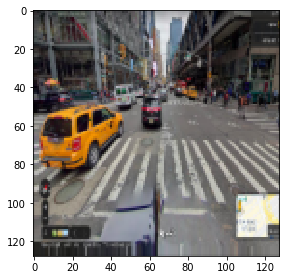

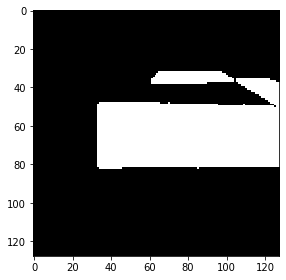

In [ ]:
image_x = random.randint(0,len(train_ids[:60]))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

In [ ]:
inputs= tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))

In [ ]:
s=tf.keras.layers.Lambda(lambda x:x / 255)(inputs)

In [ ]:
c1=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(s)

In [ ]:
c1=tf.keras.layers.Dropout(0.1)(c1)

In [ ]:
c1=tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c1)

In [ ]:
p1= tf.keras.layers.MaxPooling2D((2,2))(c1)

In [ ]:
c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p1)
c2=tf.keras.layers.Dropout(0.1)(c2)
c2=tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c2)
p2= tf.keras.layers.MaxPooling2D((2,2))(c2)

In [ ]:
c3=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p2)
c3=tf.keras.layers.Dropout(0.2)(c3)
c3=tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c3)
p3= tf.keras.layers.MaxPooling2D((2,2))(c3)

In [ ]:
c4=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p3)
c4=tf.keras.layers.Dropout(0.2)(c4)
c4=tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c4)
p4= tf.keras.layers.MaxPooling2D((2,2))(c4)

In [ ]:
c5=tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p4)
c5=tf.keras.layers.Dropout(0.3)(c5)
c5=tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c5)

In [ ]:
#Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(c6) 

In [ ]:
u7 = tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(c7) 

In [ ]:
u8 = tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(c8) 

In [ ]:
u9 = tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1])
c9 = tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer='he_normal',padding='same')(c9) 

In [ ]:
outputs = tf.keras.layers.Conv2D(1,(1,1),activation='sigmoid')(c9)

In [ ]:
model = tf.keras.Model(inputs=[inputs],outputs=[outputs])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 128, 128, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 128, 128, 16) 0           conv2d_19[0][0]                  
____________________________________________________________________________________________

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5',verbose=1, save_best_only=True)
callbacks = [
             tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
             tf.keras.callbacks.TensorBoard(log_dir='logs')]
results = model.fit(X_train[:60*11-1],Y_train[:60*11-1],validation_split=0.1,batch_size=1,epochs=25,callbacks=callbacks)
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

Epoch 1/25
593/593 [==============================] - 141s 237ms/step - loss: 0.2703 - accuracy: 0.9285 - val_loss: 0.2436 - val_accuracy: 0.9403
Epoch 2/25
593/593 [==============================] - 143s 241ms/step - loss: 0.2543 - accuracy: 0.9285 - val_loss: 0.3044 - val_accuracy: 0.9403
Epoch 3/25
593/593 [==============================] - 138s 232ms/step - loss: 0.2422 - accuracy: 0.9285 - val_loss: 0.2264 - val_accuracy: 0.9403
Epoch 4/25
593/593 [==============================] - 141s 237ms/step - loss: 0.2271 - accuracy: 0.9286 - val_loss: 0.2009 - val_accuracy: 0.9403
Epoch 5/25
593/593 [==============================] - 143s 241ms/step - loss: 0.2317 - accuracy: 0.9286 - val_loss: 0.2066 - val_accuracy: 0.9403
Epoch 6/25
593/593 [==============================] - 139s 234ms/step - loss: 0.2292 - accuracy: 0.9286 - val_loss: 0.2160 - val_accuracy: 0.9403


In [ ]:
from keras.models import load_model

model.save('/content/drive/My Drive/Colab Notebooks/my_model.h5')  # creates a HDF5 file 'my_model.h5'


Using TensorFlow backend.


60
1/1 [==============================] - 0s 1ms/step
(128, 128, 1)
(128, 128, 1)


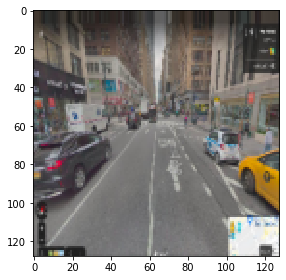

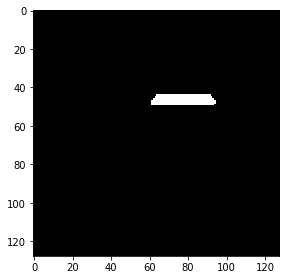

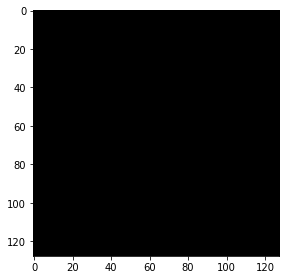

5


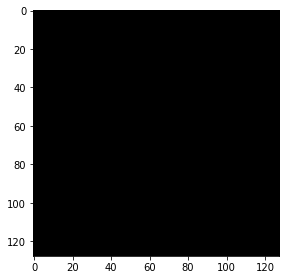

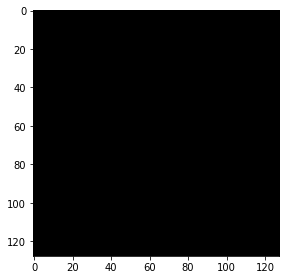

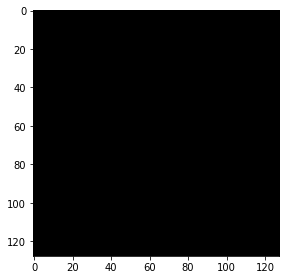

In [ ]:
idx = random.randint(0, len(X_train[:60*11-1]))
print(idx)
preds_train = model.predict(X_train[:10],verbose=1)
preds_val = model.predict(X_train[:10],verbose=1)
#preds_test = model.predict(X_test,verbose=1)
print(preds_train[2].shape)
print(Y_train[2].shape)
preds_train_t = (preds_train>0.3).astype(np.uint8)
preds_val_t = (preds_val > 0.3).astype(np.uint8)
#preds_test_t = (preds_test > 0.2).astype(np.uint8)


ix = random.randint(0,len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()


ix = random.randint(0,len(preds_val_t))
print(ix)
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()

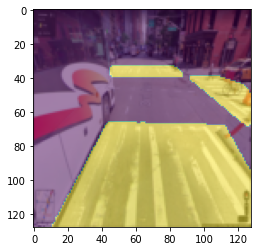

In [ ]:
pred1=np.squeeze(Y_train[7])
my_pred=X_train[7]
plt.imshow(my_pred)
plt.imshow(pred1,alpha=0.5)
plt.savefig('/content/sample_data/plot.jpg')

# Data augmentation

In [ ]:
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import os
import glob
import skimage.io as io
import skimage.transform as trans

Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]

COLOR_DICT = np.array([Sky, Building, Pole, Road, Pavement,
                          Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])


def adjustData(img,mask,flag_multi_class,num_class):
    if(flag_multi_class):
        img = img / 255
        mask = mask[:,:,:,0] if(len(mask.shape) == 4) else mask[:,:,0]
        new_mask = np.zeros(mask.shape + (num_class,))
        for i in range(num_class):
            #for one pixel in the image, find the class in mask and convert it into one-hot vector
            #index = np.where(mask == i)
            #index_mask = (index[0],index[1],index[2],np.zeros(len(index[0]),dtype = np.int64) + i) if (len(mask.shape) == 4) else (index[0],index[1],np.zeros(len(index[0]),dtype = np.int64) + i)
            #new_mask[index_mask] = 1
            new_mask[mask == i,i] = 1
        new_mask = np.reshape(new_mask,(new_mask.shape[0],new_mask.shape[1]*new_mask.shape[2],new_mask.shape[3])) if flag_multi_class else np.reshape(new_mask,(new_mask.shape[0]*new_mask.shape[1],new_mask.shape[2]))
        mask = new_mask
    elif(np.max(img) > 1):
        img = img / 255
        mask = mask /255
        mask[mask > 0.5] = 1
        mask[mask <= 0.5] = 0
    return (img,mask)



def trainGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "rgb",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (256,256),seed = 1):
    '''
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)
    train_generator = zip(image_generator, mask_generator)
    for (img,mask) in train_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)



def testGenerator(test_path,num_image = 30,target_size = (256,256),flag_multi_class = False,as_gray = True):
    for i in range(num_image):
        img = io.imread(os.path.join(test_path,"%d.png"%i),as_gray = as_gray)
        img = img / 255
        img = trans.resize(img,target_size)
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img


def geneTrainNpy(image_path,mask_path,flag_multi_class = False,num_class = 2,image_prefix = "image",mask_prefix = "mask",image_as_gray = True,mask_as_gray = True):
    image_name_arr = glob.glob(os.path.join(image_path,"%s*.png"%image_prefix))
    image_arr = []
    mask_arr = []
    for index,item in enumerate(image_name_arr):
        img = io.imread(item,as_gray = image_as_gray)
        img = np.reshape(img,img.shape + (1,)) if image_as_gray else img
        mask = io.imread(item.replace(image_path,mask_path).replace(image_prefix,mask_prefix),as_gray = mask_as_gray)
        mask = np.reshape(mask,mask.shape + (1,)) if mask_as_gray else mask
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        image_arr.append(img)
        mask_arr.append(mask)
    image_arr = np.array(image_arr)
    mask_arr = np.array(mask_arr)
    return image_arr,mask_arr


def labelVisualize(num_class,color_dict,img):
    img = img[:,:,0] if len(img.shape) == 3 else img
    img_out = np.zeros(img.shape + (3,))
    for i in range(num_class):
        img_out[img == i,:] = color_dict[i]
    return img_out / 255



def saveResult(save_path,npyfile,flag_multi_class = False,num_class = 2):
    for i,item in enumerate(npyfile):
        img = labelVisualize(num_class,COLOR_DICT,item) if flag_multi_class else item[:,:,0]
        io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)

In [ ]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGenerator = trainGenerator(1,'/content/drive/My Drive/Unet_aug','train_images_accto_mask','train_mask',data_gen_args,save_to_dir = "/content/drive/My Drive/Unet_aug/aug")

In [ ]:
num_batch = 20
for i,batch in enumerate(myGenerator):
    if(i >= num_batch):
        break

Found 847 images belonging to 1 classes.
Found 847 images belonging to 1 classes.


In [ ]:
for root,dirs,filenames in os.walk('/content/drive/My Drive/Unet_aug/train_images_accto_mask'):
  list_image=filenames
  for file_n in filenames:
    myGenerator = trainGenerator(1,'/content/drive/My Drive/Unet_aug/unet_input/'+file_n[:-4]+'/','images','masks',data_gen_args,save_to_dir = '/content/drive/My Drive/Unet_aug/unet_input/'+file_n[:-4]+'/aug')
    num_batch = 10
    for i,batch in enumerate(myGenerator):
      if(i >= num_batch):
        break

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging 

In [ ]:
image_arr,mask_arr = geneTrainNpy("/content/drive/My Drive/Unet_aug/aug","/content/drive/My Drive/Unet_aug/aug")

In [ ]:
np.save("/content/drive/My Drive/Unet_aug/image_arr.npy",image_arr)
np.save("/content/drive/My Drive/Unet_aug/mask_arr.npy",mask_arr)

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *

In [ ]:
def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model


In [ ]:
model=unet(pretrained_weights = None,input_size = (256,256,1))
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 256, 256, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_25[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_26[0][0]                  
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGenerator,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

Epoch 1/1
300/300 [==============================] - 4254s 14s/step - loss: 0.2593 - accuracy: 0.9361

Epoch 00001: loss improved from inf to 0.25930, saving model to unet_membrane.hdf5


In [ ]:
from keras.models import load_model

model.save('/content/drive/My Drive/Unet_aug/my_model.h5')  # creates a HDF5 file 'my_model.h5'


In [ ]:
testGene = testGenerator("/content/drive/My Drive/Unet_aug/test")
results = model.predict_generator(testGene,2,verbose=1)
saveResult("/content/drive/My Drive/Unet_aug/test",results)

2/2 [==============================] - 4s 2s/step


Train with npy file

In [ ]:
imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/drive/My Drive/Unet_aug/train_m/Yellowstone_Blvd_285 (1).jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/My Drive/Unet_aug/train_m', save_prefix='mask', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely